In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

In [ ]:
# Parámetros del modelo Hodgkin-Huxley
Cm = 1.0  # Capacitancia de la membrana (uF/cm^2)
gNa = 120.0  # Conductancia máxima de Na+ (mS/cm^2)
gK = 36.0  # Conductancia máxima de K+ (mS/cm^2)
gL = 0.3  # Conductancia de fuga (mS/cm^2)
ENa = 50.0  # Potencial de equilibrio de Na+ (mV)
EK = -77.0  # Potencial de equilibrio de K+ (mV)
EL = -54.4  # Potencial de equilibrio de fuga (mV)

# Parámetros sinápticos
g_syn = 0.1  # Conductancia máxima de la sinapsis (mS/cm^2)
Esyn = 0.0  # Potencial de reversión de la sinapsis (mV)

# Tiempo de simulación
dt = 0.01  # Paso de tiempo (ms)
T = 30.0  # Duración de la simulación (ms)
time = np.arange(0, T, dt)

# Estímulo externo a la primera neurona
I_ext = np.zeros(len(time))
I_ext[100:200] = 10.0  # Pulso de corriente (uA/cm^2)

# Funciones auxiliares para Hodgkin-Huxley
def alpha_m(V): return 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
def beta_m(V): return 4.0 * np.exp(-(V + 65) / 18)
def alpha_h(V): return 0.07 * np.exp(-(V + 65) / 20)
def beta_h(V): return 1.0 / (1 + np.exp(-(V + 35) / 10))
def alpha_n(V): return 0.01 * (V + 55) / (1 - np.exp(-(V + 55) / 10))
def beta_n(V): return 0.125 * np.exp(-(V + 65) / 80)

# Inicialización de variables
V1 = -65.0  # Voltaje inicial de la neurona 1 (mV)
V2 = -65.0  # Voltaje inicial de la neurona 2 (mV)
m1, h1, n1 = 0.05, 0.6, 0.32  # Variables de compuerta para neurona 1
m2, h2, n2 = 0.05, 0.6, 0.32  # Variables de compuerta para neurona 2

# Almacenamiento de resultados
V1_trace = []
V2_trace = []

# Simulación
for t in range(len(time)):
    # Corrientes en la neurona 1
    INa1 = gNa * (m1**3) * h1 * (V1 - ENa)
    IK1 = gK * (n1**4) * (V1 - EK)
    IL1 = gL * (V1 - EL)
    Isyn12 = g_syn * (V1 - Esyn)  # Corriente sináptica desde neurona 1 a 2
    I1 = I_ext[t] - INa1 - IK1 - IL1 - Isyn12

    # Corrientes en la neurona 2
    INa2 = gNa * (m2**3) * h2 * (V2 - ENa)
    IK2 = gK * (n2**4) * (V2 - EK)
    IL2 = gL * (V2 - EL)
    Isyn21 = g_syn * (V2 - Esyn)  # Corriente sináptica desde neurona 2 a 1
    I2 = -INa2 - IK2 - IL2 + Isyn12  # Conexión unidireccional

    # Ecuaciones diferenciales para los voltajes
    dV1 = I1 / Cm
    dV2 = I2 / Cm

    # Actualización de variables de compuerta (neuronas 1 y 2)
    m1 += dt * (alpha_m(V1) * (1 - m1) - beta_m(V1) * m1)
    h1 += dt * (alpha_h(V1) * (1 - h1) - beta_h(V1) * h1)
    n1 += dt * (alpha_n(V1) * (1 - n1) - beta_n(V1) * n1)

    m2 += dt * (alpha_m(V2) * (1 - m2) - beta_m(V2) * m2)
    h2 += dt * (alpha_h(V2) * (1 - h2) - beta_h(V2) * h2)
    n2 += dt * (alpha_n(V2) * (1 - n2) - beta_n(V2) * n2)

    # Actualización de voltajes
    V1 += dt * dV1
    V2 += dt * dV2

    # Almacenar resultados
    V1_trace.append(V1)
    V2_trace.append(V2)


MovieWriter ffmpeg unavailable; using Pillow instead.


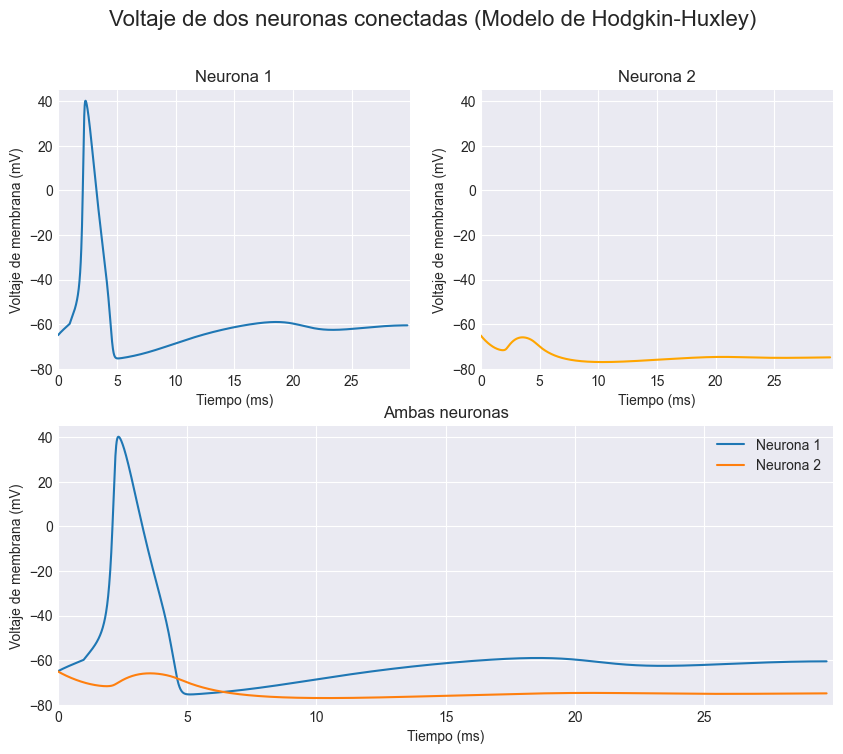

In [ ]:
plt.style.use("seaborn-v0_8-darkgrid")

V1_trace_np = np.array(V1_trace)
V2_trace_np = np.array(V2_trace)
time_np = np.array(time)

fig = plt.figure(figsize=(10, 8))
fig.suptitle("Voltaje de dos neuronas conectadas (Modelo de Hodgkin-Huxley)",fontsize=16)

ax1 = plt.subplot2grid((2, 2), (0, 0))
neuro1, = ax1.plot([], [], label="Neurona 1")
ax1.set_xlabel("Tiempo (ms)")
ax1.set_ylabel("Voltaje de membrana (mV)")
ax1.set_title("Neurona 1")
ax1.grid(True)
ax1.set_xlim(time_np[0], time_np[-1])
ax1.set_ylim(np.min(V1_trace_np) - 5, np.max(V1_trace_np) + 5)  


ax2 = plt.subplot2grid((2, 2), (0, 1))
neuro2, = ax2.plot([], [], label="Neurona 2",color='orange')
ax2.set_xlabel("Tiempo (ms)")
ax2.set_ylabel("Voltaje de membrana (mV)")
ax2.set_title("Neurona 2")
ax2.grid(True)
ax2.set_xlim(time_np[0], time_np[-1])
ax2.set_ylim(np.min(V1_trace_np) - 5, np.max(V1_trace_np) + 5)  


ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
neuro_1, = ax3.plot([], [], label="Neurona 1")
neuro_2, = ax3.plot([], [], label="Neurona 2")
ax3.set_xlabel("Tiempo (ms)")
ax3.set_ylabel("Voltaje de membrana (mV)")
ax3.set_title("Ambas neuronas")
ax3.legend()
ax3.grid(True)
ax3.set_xlim(time_np[0], time_np[-1])
ax3.set_ylim(np.min(V1_trace_np) - 5, np.max(V1_trace_np) + 5)  

def update(frame):

    neuro_1.set_data(time_np[:frame], V1_trace_np[:frame])
    neuro_2.set_data(time_np[:frame], V2_trace_np[:frame])
    neuro1.set_data(time_np[:frame], V1_trace_np[:frame])
    neuro2.set_data(time_np[:frame], V2_trace_np[:frame])
    return neuro1, neuro2,
animation = FuncAnimation(fig, update, frames=range(0, len(time_np), 25), interval=100)
animation.save("neurona_test.gif")
plt.show()